In [1]:
import keras

Using TensorFlow backend.


In [2]:
#from keras.preprocessing import image
#from keras.engine import Layer
from keras.layers import Conv2D, Conv3D, UpSampling2D, InputLayer, Conv2DTranspose, Input, Reshape, merge, concatenate
from keras import optimizers
#from keras.layers import Activation, Dense, Dropout, Flatten
#from keras.layers.normalization import BatchNormalization
#from keras.callbacks import TensorBoard
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

#from time import time
import numpy as np
#import os
#import random
import tensorflow as tf
from PIL import Image, ImageFile
import matplotlib.pyplot as plt


In [3]:
train_dir = './dataset/train'
seed = 6

bw = ImageDataGenerator(rescale=1./255)
c = ImageDataGenerator(rescale=1./255)


x = bw.flow_from_directory(train_dir,
                          target_size=(224,224),
                          color_mode='grayscale',
                          class_mode=None,
                          seed=seed)

y = c.flow_from_directory(train_dir,
                          target_size=(224,224),
                          class_mode=None,
                          seed=seed)

train_generator = zip(x, y)



Found 681 images belonging to 1 classes.
Found 681 images belonging to 1 classes.


In [4]:
validation_dir = './dataset/validation'
seed = 6

bw = ImageDataGenerator(rescale=1./255)
c = ImageDataGenerator(rescale=1./255)


x = bw.flow_from_directory(validation_dir,
                          target_size=(224,224),
                          color_mode='grayscale',
                          class_mode=None,
                          seed=seed)

y = c.flow_from_directory(validation_dir,
                          target_size=(224,224),
                          class_mode=None,
                          seed=seed)

validation_generator = zip(x, y)

Found 211 images belonging to 1 classes.
Found 211 images belonging to 1 classes.


In [5]:
#Encoder
encoder_input = Input(shape=(224, 224, 1,))
encoder_output = Conv2D(64, (3,3), activation='relu', padding='same', strides=2)(encoder_input)
encoder_output = Conv2D(128, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(128, (3,3), activation='relu', padding='same', strides=2)(encoder_output)
encoder_output = Conv2D(256, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(256, (3,3), activation='relu', padding='same', strides=2)(encoder_output)
encoder_output = Conv2D(512, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(512, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(256, (3,3), activation='relu', padding='same')(encoder_output)

In [6]:
#Decoder
decoder_output = Conv2D(128, (3,3), activation='relu', padding='same')(encoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)
decoder_output = Conv2D(64, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)
decoder_output = Conv2D(32, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = Conv2D(16, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = Conv2D(3, (3, 3), activation='tanh', padding='same')(decoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)
model = Model(inputs=encoder_input, outputs=decoder_output)

In [7]:
#model.summary()

In [8]:
opt = tf.keras.optimizers.Adam(learning_rate=0.002)

model.compile(opt, loss='mse', metrics=['accuracy'])

In [9]:
# steps_per_epoch: Total number of steps (batches of samples) to yield from generator
# before declaring one epoch finished and starting the next epoch.
# It should typically be equal to the number of samples if your dataset divided by the batch size.
steps = 30 ### 2)100/62%acc #### 1)21/50%acc
val_steps = 6
iterations = 500 ### 2)30 ### 1)20

history = model.fit_generator(train_generator,
                              steps_per_epoch=steps,
                              epochs=iterations,
                              validation_data=validation_generator,
                              validation_steps=val_steps)

Epoch 1/500
30/30 [==============================] - 72s 2s/step - loss: 0.1391 - accuracy: 0.4168 - val_loss: 0.0418 - val_accuracy: 0.2149
Epoch 2/500
30/30 [==============================] - 68s 2s/step - loss: 0.0320 - accuracy: 0.4109 - val_loss: 0.0228 - val_accuracy: 0.3306
Epoch 3/500
30/30 [==============================] - 66s 2s/step - loss: 0.0208 - accuracy: 0.4301 - val_loss: 0.0201 - val_accuracy: 0.4503
Epoch 4/500
30/30 [==============================] - 71s 2s/step - loss: 0.0183 - accuracy: 0.4400 - val_loss: 0.0177 - val_accuracy: 0.4263
Epoch 5/500
30/30 [==============================] - 67s 2s/step - loss: 0.0166 - accuracy: 0.4394 - val_loss: 0.0193 - val_accuracy: 0.4345
Epoch 6/500
30/30 [==============================] - 68s 2s/step - loss: 0.0161 - accuracy: 0.4609 - val_loss: 0.0161 - val_accuracy: 0.4539
Epoch 7/500
30/30 [==============================] - 69s 2s/step - loss: 0.0154 - accuracy: 0.4808 - val_loss: 0.0158 - val_accuracy: 0.4739
Epoch 8/500
3

Epoch 59/500
30/30 [==============================] - 69s 2s/step - loss: 0.0097 - accuracy: 0.5893 - val_loss: 0.0125 - val_accuracy: 0.5777
Epoch 60/500
30/30 [==============================] - 73s 2s/step - loss: 0.0100 - accuracy: 0.5964 - val_loss: 0.0123 - val_accuracy: 0.5573
Epoch 61/500
30/30 [==============================] - 68s 2s/step - loss: 0.0104 - accuracy: 0.5856 - val_loss: 0.0140 - val_accuracy: 0.5604
Epoch 62/500
30/30 [==============================] - 73s 2s/step - loss: 0.0101 - accuracy: 0.5932 - val_loss: 0.0124 - val_accuracy: 0.5644
Epoch 63/500
30/30 [==============================] - 70s 2s/step - loss: 0.0098 - accuracy: 0.5907 - val_loss: 0.0100 - val_accuracy: 0.5714
Epoch 64/500
30/30 [==============================] - 68s 2s/step - loss: 0.0095 - accuracy: 0.6055 - val_loss: 0.0123 - val_accuracy: 0.5523
Epoch 65/500
30/30 [==============================] - 74s 2s/step - loss: 0.0097 - accuracy: 0.5970 - val_loss: 0.0122 - val_accuracy: 0.5464
Epoch 

30/30 [==============================] - 67s 2s/step - loss: 0.0077 - accuracy: 0.6725 - val_loss: 0.0108 - val_accuracy: 0.5473
Epoch 117/500
30/30 [==============================] - 67s 2s/step - loss: 0.0078 - accuracy: 0.6578 - val_loss: 0.0093 - val_accuracy: 0.6056
Epoch 118/500
30/30 [==============================] - 69s 2s/step - loss: 0.0077 - accuracy: 0.6682 - val_loss: 0.0118 - val_accuracy: 0.6080
Epoch 119/500
30/30 [==============================] - 70s 2s/step - loss: 0.0082 - accuracy: 0.6415 - val_loss: 0.0104 - val_accuracy: 0.5684
Epoch 120/500
30/30 [==============================] - 67s 2s/step - loss: 0.0081 - accuracy: 0.6557 - val_loss: 0.0115 - val_accuracy: 0.5881
Epoch 121/500
30/30 [==============================] - 63s 2s/step - loss: 0.0077 - accuracy: 0.6610 - val_loss: 0.0107 - val_accuracy: 0.5873
Epoch 122/500
30/30 [==============================] - 71s 2s/step - loss: 0.0077 - accuracy: 0.6657 - val_loss: 0.0096 - val_accuracy: 0.6061
Epoch 123/500

30/30 [==============================] - 72s 2s/step - loss: 0.0071 - accuracy: 0.6965 - val_loss: 0.0098 - val_accuracy: 0.6118
Epoch 174/500
30/30 [==============================] - 69s 2s/step - loss: 0.0073 - accuracy: 0.7155 - val_loss: 0.0098 - val_accuracy: 0.5913
Epoch 175/500
30/30 [==============================] - 72s 2s/step - loss: 0.0070 - accuracy: 0.7117 - val_loss: 0.0089 - val_accuracy: 0.6081
Epoch 176/500
30/30 [==============================] - 66s 2s/step - loss: 0.0070 - accuracy: 0.7265 - val_loss: 0.0087 - val_accuracy: 0.5967
Epoch 177/500
30/30 [==============================] - 73s 2s/step - loss: 0.0070 - accuracy: 0.7199 - val_loss: 0.0109 - val_accuracy: 0.5786
Epoch 178/500
30/30 [==============================] - 66s 2s/step - loss: 0.0070 - accuracy: 0.7144 - val_loss: 0.0088 - val_accuracy: 0.6435
Epoch 179/500
30/30 [==============================] - 69s 2s/step - loss: 0.0068 - accuracy: 0.7306 - val_loss: 0.0105 - val_accuracy: 0.5905
Epoch 180/500

30/30 [==============================] - 76s 3s/step - loss: 0.0068 - accuracy: 0.7388 - val_loss: 0.0108 - val_accuracy: 0.6236
Epoch 231/500
30/30 [==============================] - 73s 2s/step - loss: 0.0069 - accuracy: 0.7335 - val_loss: 0.0098 - val_accuracy: 0.5816
Epoch 232/500
30/30 [==============================] - 73s 2s/step - loss: 0.0068 - accuracy: 0.7382 - val_loss: 0.0103 - val_accuracy: 0.6214
Epoch 233/500
30/30 [==============================] - 76s 3s/step - loss: 0.0066 - accuracy: 0.7446 - val_loss: 0.0114 - val_accuracy: 0.6292
Epoch 234/500
30/30 [==============================] - 72s 2s/step - loss: 0.0066 - accuracy: 0.7451 - val_loss: 0.0112 - val_accuracy: 0.5788
Epoch 235/500
30/30 [==============================] - 74s 2s/step - loss: 0.0066 - accuracy: 0.7458 - val_loss: 0.0093 - val_accuracy: 0.6277
Epoch 236/500
30/30 [==============================] - 76s 3s/step - loss: 0.0065 - accuracy: 0.7540 - val_loss: 0.0112 - val_accuracy: 0.6162
Epoch 237/500

30/30 [==============================] - 70s 2s/step - loss: 0.0065 - accuracy: 0.7367 - val_loss: 0.0094 - val_accuracy: 0.5783
Epoch 288/500
30/30 [==============================] - 72s 2s/step - loss: 0.0065 - accuracy: 0.7477 - val_loss: 0.0087 - val_accuracy: 0.5814
Epoch 289/500
30/30 [==============================] - 72s 2s/step - loss: 0.0065 - accuracy: 0.7431 - val_loss: 0.0104 - val_accuracy: 0.6321
Epoch 290/500
30/30 [==============================] - 70s 2s/step - loss: 0.0066 - accuracy: 0.7323 - val_loss: 0.0110 - val_accuracy: 0.6421
Epoch 291/500
30/30 [==============================] - 71s 2s/step - loss: 0.0065 - accuracy: 0.7449 - val_loss: 0.0091 - val_accuracy: 0.6194
Epoch 292/500
30/30 [==============================] - 71s 2s/step - loss: 0.0068 - accuracy: 0.7530 - val_loss: 0.0100 - val_accuracy: 0.6248
Epoch 293/500
30/30 [==============================] - 73s 2s/step - loss: 0.0063 - accuracy: 0.7541 - val_loss: 0.0091 - val_accuracy: 0.6230
Epoch 294/500

30/30 [==============================] - 76s 3s/step - loss: 0.0063 - accuracy: 0.7537 - val_loss: 0.0078 - val_accuracy: 0.6126
Epoch 345/500
30/30 [==============================] - 75s 3s/step - loss: 0.0063 - accuracy: 0.7489 - val_loss: 0.0087 - val_accuracy: 0.6195
Epoch 346/500
30/30 [==============================] - 71s 2s/step - loss: 0.0066 - accuracy: 0.7443 - val_loss: 0.0093 - val_accuracy: 0.6158
Epoch 347/500
30/30 [==============================] - 74s 2s/step - loss: 0.0065 - accuracy: 0.7382 - val_loss: 0.0087 - val_accuracy: 0.6297
Epoch 348/500
30/30 [==============================] - 75s 3s/step - loss: 0.0063 - accuracy: 0.7561 - val_loss: 0.0107 - val_accuracy: 0.6008
Epoch 349/500
30/30 [==============================] - 75s 3s/step - loss: 0.0067 - accuracy: 0.7206 - val_loss: 0.0091 - val_accuracy: 0.6029
Epoch 350/500
30/30 [==============================] - 74s 2s/step - loss: 0.0067 - accuracy: 0.7280 - val_loss: 0.0083 - val_accuracy: 0.5860
Epoch 351/500

30/30 [==============================] - 66s 2s/step - loss: 0.0065 - accuracy: 0.7560 - val_loss: 0.0110 - val_accuracy: 0.5825
Epoch 402/500
30/30 [==============================] - 64s 2s/step - loss: 0.0065 - accuracy: 0.7416 - val_loss: 0.0104 - val_accuracy: 0.6531
Epoch 403/500
30/30 [==============================] - 70s 2s/step - loss: 0.0062 - accuracy: 0.7596 - val_loss: 0.0093 - val_accuracy: 0.6109
Epoch 404/500
30/30 [==============================] - 66s 2s/step - loss: 0.0062 - accuracy: 0.7620 - val_loss: 0.0091 - val_accuracy: 0.6289
Epoch 405/500
30/30 [==============================] - 62s 2s/step - loss: 0.0061 - accuracy: 0.7646 - val_loss: 0.0098 - val_accuracy: 0.5932
Epoch 406/500
30/30 [==============================] - 68s 2s/step - loss: 0.0061 - accuracy: 0.7666 - val_loss: 0.0079 - val_accuracy: 0.6380
Epoch 407/500
30/30 [==============================] - 66s 2s/step - loss: 0.0061 - accuracy: 0.7745 - val_loss: 0.0104 - val_accuracy: 0.6271
Epoch 408/500

30/30 [==============================] - 66s 2s/step - loss: 0.0061 - accuracy: 0.7677 - val_loss: 0.0091 - val_accuracy: 0.6193
Epoch 459/500
30/30 [==============================] - 65s 2s/step - loss: 0.0063 - accuracy: 0.7627 - val_loss: 0.0097 - val_accuracy: 0.6169
Epoch 460/500
30/30 [==============================] - 68s 2s/step - loss: 0.0060 - accuracy: 0.7727 - val_loss: 0.0093 - val_accuracy: 0.6271
Epoch 461/500
30/30 [==============================] - 70s 2s/step - loss: 0.0059 - accuracy: 0.7774 - val_loss: 0.0119 - val_accuracy: 0.6151
Epoch 462/500
30/30 [==============================] - 62s 2s/step - loss: 0.0060 - accuracy: 0.7788 - val_loss: 0.0085 - val_accuracy: 0.6179
Epoch 463/500
30/30 [==============================] - 67s 2s/step - loss: 0.0060 - accuracy: 0.7795 - val_loss: 0.0084 - val_accuracy: 0.6201
Epoch 464/500
30/30 [==============================] - 66s 2s/step - loss: 0.0062 - accuracy: 0.7601 - val_loss: 0.0080 - val_accuracy: 0.6268
Epoch 465/500

In [81]:
#model.save_weights('testModel_weights(30steps500epochs).h5')

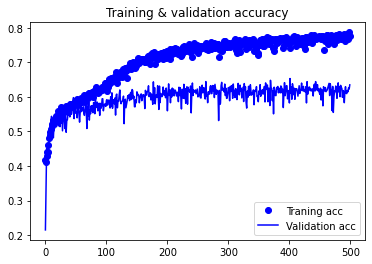

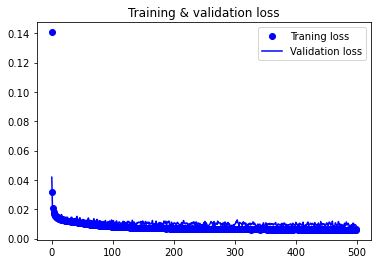

In [11]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Traning acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training & validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Traning loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training & validation loss')
plt.legend()

plt.show()

In [12]:
history

In [20]:
test_dir = './dataset/test'
seed = 6

bw = ImageDataGenerator(rescale=1./255)
c = ImageDataGenerator(rescale=1./255)


test_x = bw.flow_from_directory(test_dir,
                          target_size=(224,224),
                          color_mode='grayscale',
                          class_mode=None,
                          seed=seed)

test_y = bw.flow_from_directory(test_dir,
                          target_size=(224,224),
                          class_mode=None,
                          seed=seed)

Found 11 images belonging to 1 classes.
Found 11 images belonging to 1 classes.


In [14]:
testpic = model.predict_on_batch(test_x[0])

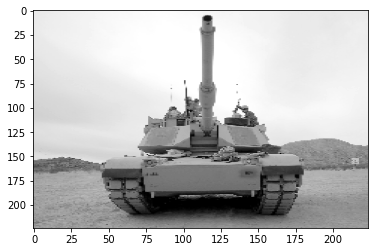

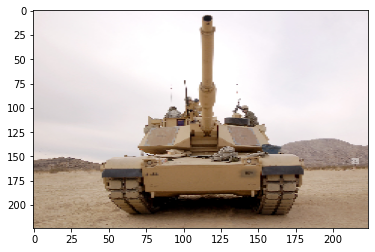

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


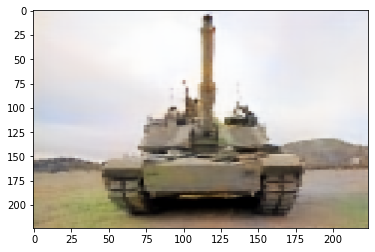

In [25]:
picNum = 6

plt.imshow(test_x[0][picNum],aspect="auto", cmap=plt.get_cmap('gray'))
plt.show()
#print(x[0])

plt.imshow(test_y[0][picNum],aspect="auto")
plt.show()

plt.imshow(testpic[picNum],aspect="auto")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


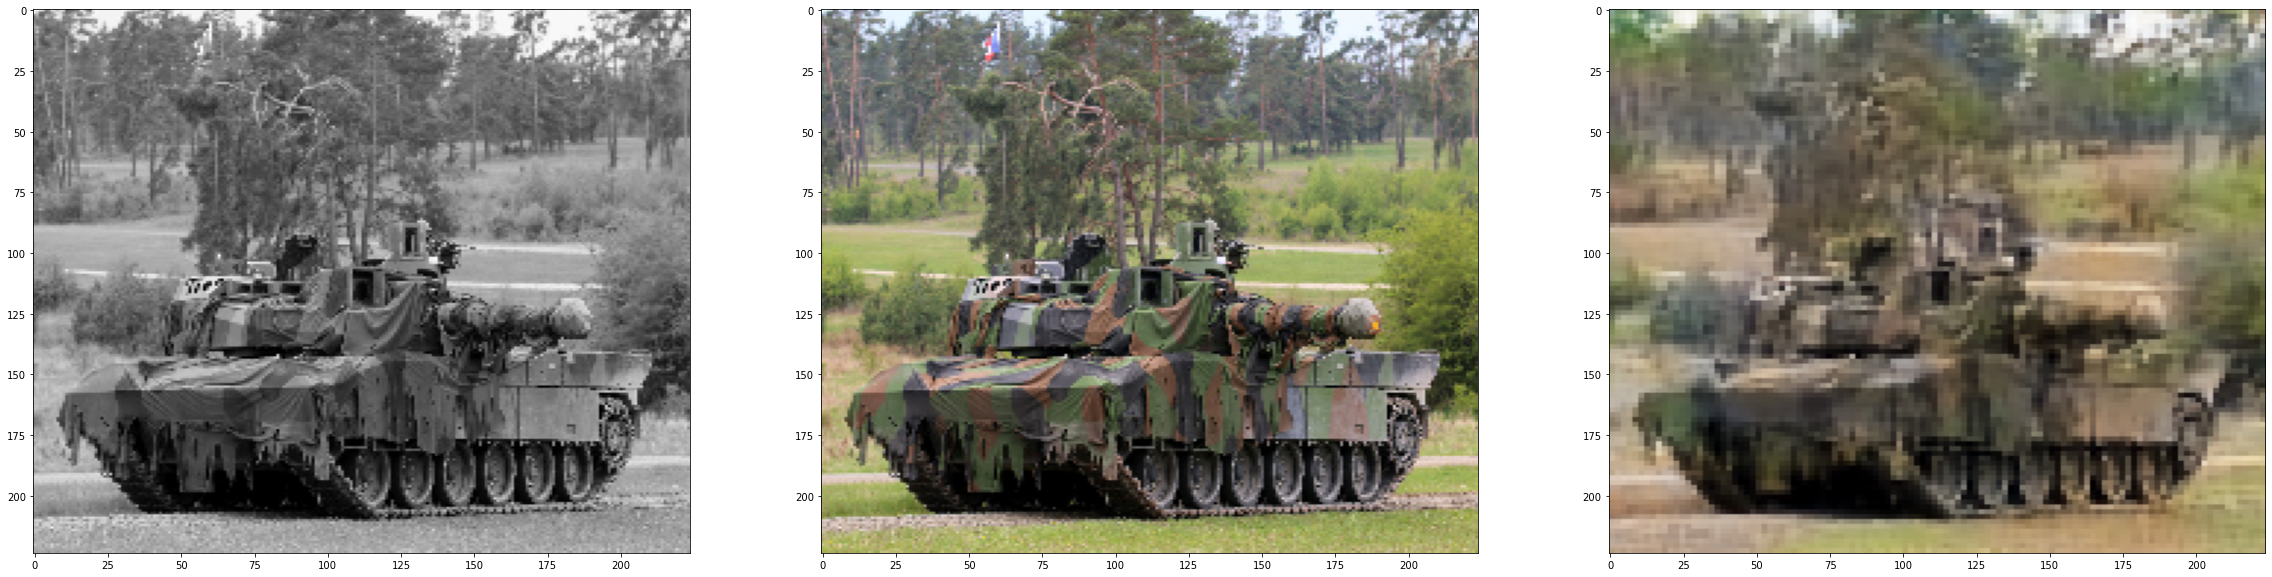

In [77]:
picNum = 4
f, axarr = plt.subplots(1,3, figsize=(40,10))
axarr[0].imshow(test_x[0][picNum],aspect="auto", cmap=plt.get_cmap('gray'))
axarr[1].imshow(test_y[0][picNum],aspect="auto")
axarr[2].imshow(testpic[picNum],aspect="auto")


In [64]:
testBatchSize = len(test_x[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


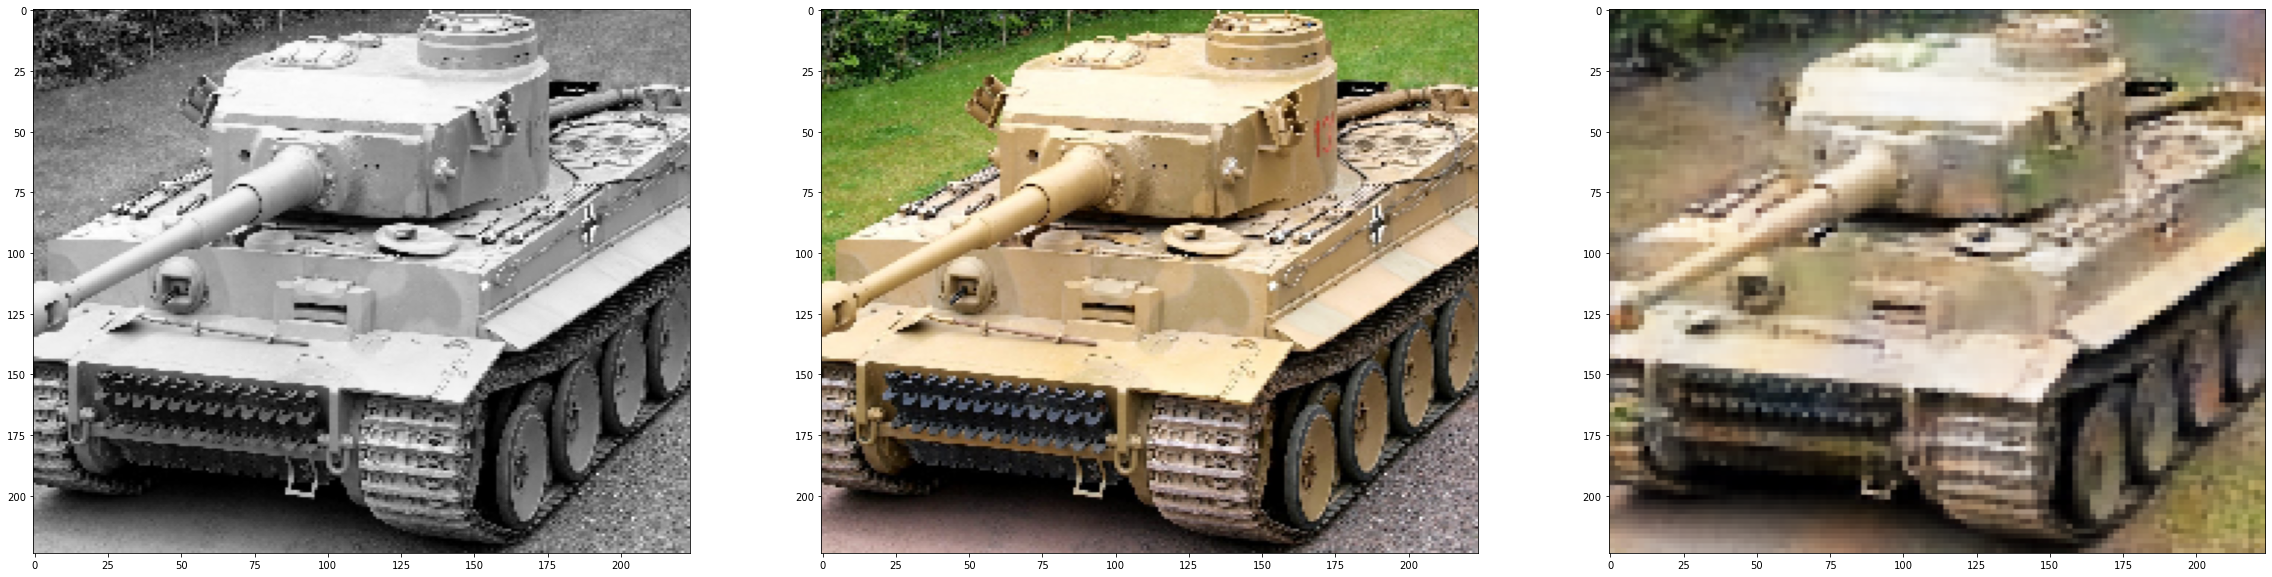

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [80]:
f, axarr = plt.subplots(1,3, figsize=(40,10))
for i in range(0, testBatchSize):
    axarr[0].imshow(test_x[0][i],aspect="auto", cmap=plt.get_cmap('gray'))
    axarr[1].imshow(test_y[0][i],aspect="auto")
    axarr[2].imshow(testpic[i],aspect="auto")
    plt.show()